In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read in a file_name and then open that file into a dataframe.

def read_csv_file(file_name):
    data = pd.read_csv(file_name)
    return data


In [2]:
def visualize_linear_model(model, X, y):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Data')
    
    # Plot the regression line
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    plt.plot(x_line, y_line, color='red', label='Linear Regression')
    
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()


In [3]:
# Build a regression model based on a dataframe.

def build_regression_model(data):
    # Split the data into input features (X) and target variable (y)
    X = data.iloc[:,0:1]
    y = data.iloc[:,1]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    
    visualize_linear_model(model, X, y)
    
    
    return model, mse

In [4]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

你的文件名是？hpd.txt
需要作为x轴的列名：size
需要作为y轴的列名：price


C:\Users\Kaiwen Shi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


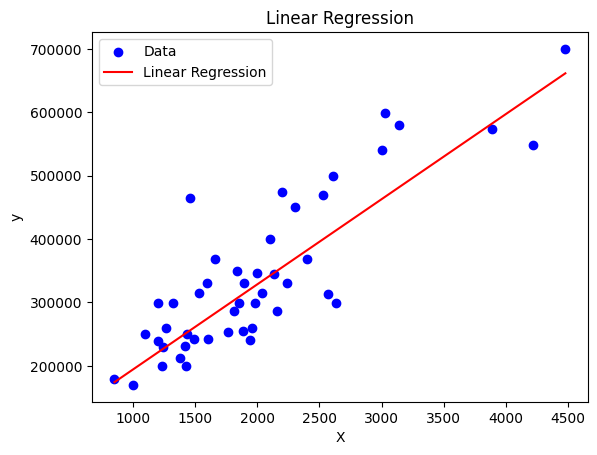

这组数据的线性回归方程是:

y = 134.36 * X + 59771.49

均方误差为

8407789060.4898405


In [10]:
file_input = input("你的文件名是？")

try:
    df = pd.read_csv(file_input)
except FileNotFoundError:
    print("Error: 错误的文件名，未找到文件.")
    raise
except Exception as e:
    print("Error:", str(e))
    raise
        
col1_name = input("需要作为x轴的列名：")
col2_name = input("需要作为y轴的列名：")

if (df.columns[0] != col1_name):
    df = swap_columns(df, df.columns[0], col1_name)

if (df.columns[1] != col2_name):
    df = swap_columns(df, df.columns[1], col2_name)


df.head()

model,mse = build_regression_model(df)

print("这组数据的线性回归方程是:\n")
equation = f'y = {model.coef_[0]:.2f} * X + {model.intercept_:.2f}'
print(equation + "\n")

print("均方误差为:\n")
print(mse)

